In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import imutils as im

In [2]:
def plot(image, color=cv.COLOR_BGR2RGB, **args):
    plt.axis('off')
    plt.imshow(image if color is None else cv.cvtColor(image, color), **args)

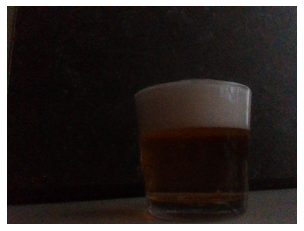

In [3]:
image = cv.imread('../img/demo1.png')
plot(image)

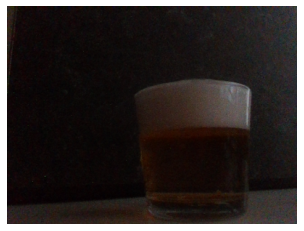

In [4]:
img = im.resize(image, width=400, height=400)
plot(img)

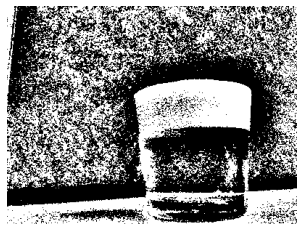

In [5]:
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

adaptive_threshold = cv.adaptiveThreshold(gray, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 125, 1)
plot(adaptive_threshold, None, cmap='gray')

3.414213538169861 0.5
15.313708305358887 6.0
9.656854152679443 5.0
42.62741661071777 33.0
232.8355668783188 257.5
26.727921843528748 35.5
257.90663480758667 353.0
182.7523069381714 310.5
2246.4103717803955 26127.0


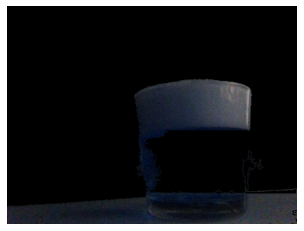

In [6]:
contours, hierarchy = cv.findContours(adaptive_threshold, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
imgContours = img.copy()

Lratio = Lperimeter = 0

for c in range(len(contours)):
    area = cv.contourArea(contours[c])
    perimeter = cv.arcLength(contours[c], True)
    if perimeter > 0:
        ratio = area / perimeter
        if ratio > Lratio:
            largest = contours[c]
            Lratio = ratio
            Lperimeter = perimeter
            Larea = area
            print(perimeter, area)
cv.drawContours(imgContours, [largest], -1, (255, 0, 0), 1)
epsilon = 0.05 * Lperimeter
epsilon = 0
edge = cv.approxPolyDP(largest, epsilon, True)
mask = np.zeros((img.shape[0], img.shape[1]), 'uint8') * 125
cv.fillConvexPoly(mask, edge, 255, 1)
extracted = np.zeros_like(img)
extracted[mask == 255] = img[mask == 255]
extracted[np.where((extracted == [125, 125, 125]).all(axis =2))] = [0, 0, 20]
plot(extracted, None, cmap='gray')

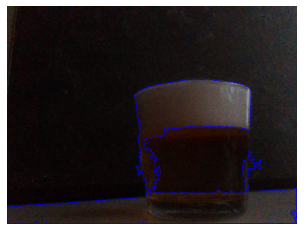

In [7]:
plot(imgContours)

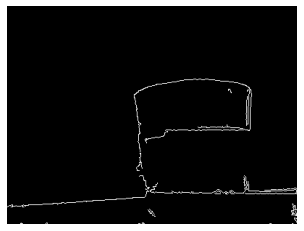

In [8]:
edges = cv.Canny(extracted, 70, 200)
color_edges = cv.cvtColor(edges, cv.COLOR_GRAY2BGR)
plot(edges, None, cmap='gray')